# Preprocessing

In [1]:
import numpy as np 
from scipy import misc 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


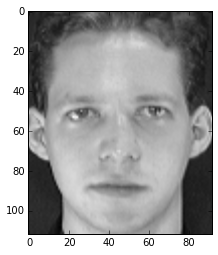

In [2]:
#creating vector representations of image 1

img_path = "images/" # path to files in ‘images’ folder 
img = misc.imread(img_path + "1.pgm")
plt.imshow(img, cmap=plt.cm.gray)
img_vec = img.flatten()

In [3]:
#creating matrix representation of all images

img_mat=np.empty([0,10304])

for path in glob.iglob("images/*.pgm"):
    img = misc.imread(path)
    img_vec=img.flatten()
    img_mat = np.vstack((img_mat, img_vec))


## Part A

In [4]:
centering=np.mean(img_mat, axis=0) #finding means

In [5]:
adj=img_mat-centering[np.newaxis,:] #centering data

## Part B

In [6]:
img_mat_svd=np.linalg.svd(adj, full_matrices=False) #calculating svd

## Part C

In [7]:
k_list=[1, 10, 50, 100, 150, 200, 250, 400]

In [8]:
k_singular_values=[img_mat_svd[2][0:k] for k in k_list] #creating a set of loadings for each of the k's

In [9]:
k_projections=[np.dot(adj, np.transpose(test)) for test in k_singular_values] #projecting

# Part D

In [10]:
k_reconstruct=[np.dot(project,sv) for project, sv in zip(k_projections, k_singular_values)] 
#reconstructed image matrixes for top 'k' singular values.

In [11]:
img0=[np.reshape(rec_mat[0,:], (112,92)) for rec_mat in k_reconstruct] #using image 0 (first image) reconstructions

In [12]:
K={n:img for n,img in zip(k_list,img0)} #helper dictionary
img_display_dict={n: [k,K[k]] for n,k in list(enumerate(k_list))} #helper dictionary

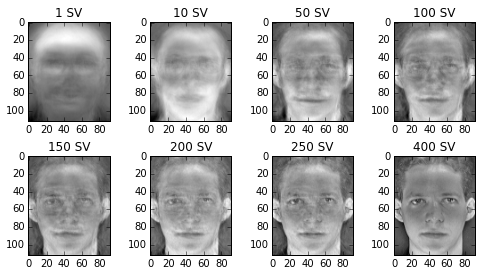

In [13]:
#creating images of the projections of the first k singular values on image 1

f = pylab.figure(figsize=(8,8))
f.subplots_adjust(hspace=.5,wspace=.5)
for k in range(len(K)):
    if k<4:
        f.add_subplot(2, 4, k+1).set_title("%d SV" %img_display_dict[k][0])
    else:
        f.add_subplot(1, 4, k-3).set_title("%d SV" %img_display_dict[k][0])
    pylab.imshow(img_display_dict[k][1], cmap=plt.cm.gray)
pylab.show()